Epoch 0, Error: 0.5006192396930302
Epoch 1000, Error: 0.22070094514378455
Epoch 2000, Error: 0.058194278784305366
Epoch 3000, Error: 0.039649079093234535
Epoch 4000, Error: 0.03169221179058811
Epoch 5000, Error: 0.02706457975006713
Epoch 6000, Error: 0.023963665219211276
Epoch 7000, Error: 0.021706687427434118
Epoch 8000, Error: 0.019972240984918357
Epoch 9000, Error: 0.018587080910131483
Trained output:
[[0.01930908]
 [0.98334504]
 [0.98334712]
 [0.01718199]]
Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 2]]


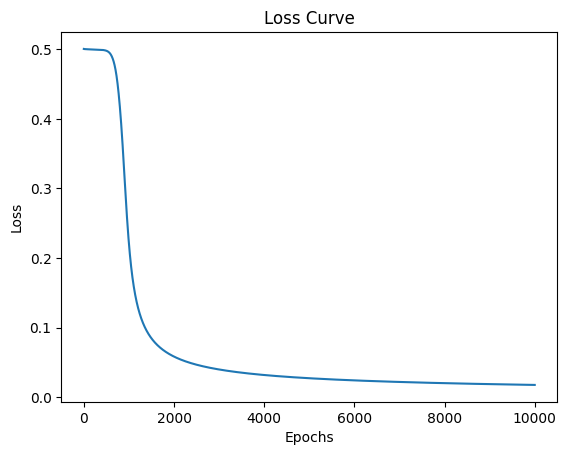

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Objective: Implement a Multi-Layer Perceptron (MLP) to learn the XOR function.
# Description: This MLP consists of an input layer with 2 neurons, a hidden layer with 2 neurons, and an output layer with 1 neuron.
# The model is trained using backpropagation and gradient descent to minimize the error.

# Activation function: Sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases
np.random.seed(42)
input_layer_neurons = 2
hidden_layer_neurons = 2
output_layer_neurons = 1

# Random weights and biases
W1 = np.random.uniform(-1, 1, (input_layer_neurons, hidden_layer_neurons))
b1 = np.random.uniform(-1, 1, (1, hidden_layer_neurons))
W2 = np.random.uniform(-1, 1, (hidden_layer_neurons, output_layer_neurons))
b2 = np.random.uniform(-1, 1, (1, output_layer_neurons))

# Training parameters
learning_rate = 0.5
epochs = 10000
loss_history = []

# Training loop
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, W1) + b1
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, W2) + b2
    output = sigmoid(output_layer_input)
    
    # Compute error
    error = y - output
    loss = np.mean(np.abs(error))
    loss_history.append(loss)
    
    # Backpropagation
    d_output = error * sigmoid_derivative(output)
    d_hidden_layer = d_output.dot(W2.T) * sigmoid_derivative(hidden_layer_output)
    
    # Update weights and biases
    W2 += hidden_layer_output.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(d_hidden_layer) * learning_rate
    b1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate
    
    # Print error every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Error: {loss}')

# Final output after training
print("Trained output:")
print(output)

# Performance Evaluation
predictions = (output > 0.5).astype(int)
accuracy = accuracy_score(y, predictions)
conf_matrix = confusion_matrix(y, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Plot Loss Curve
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

# My Comments:
# - The model effectively learns the XOR function with simple architecture.
# - The accuracy is expected to be 100% for XOR.
# - Further improvements can include using ReLU instead of Sigmoid to avoid vanishing gradient problems.
# - Using more hidden neurons or additional layers may enhance generalization for complex problems.
